In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt
#Funcion para anonimizar los datos sensibles
def anonimizarCol(df,col,palabra_clave):
    for i in range(len(df[col])):
        df[col][i] = palabra_clave + str(i)
    return df
dfA = pd.read_csv("notas2a.csv",sep=",")
dfB = pd.read_csv("notas2b.csv",sep=",")

Pipeline, anonymise and join the dataframes.

In [57]:
#Agregamos una columna que nos diga de que curso se trata cada fila.
dfA["curso"] = "a"
dfB["curso"] = "b"
frames = [dfA, dfB]

In [58]:
#concat the 2 df into a larger one
df = pd.concat(frames).reset_index(drop=True)

In [59]:
#Miramos como quedo el dataset
df.drop(labels=["apellido","nombre"],axis = 1,inplace=True)

In [60]:
#Buscamos los Na
df.isnull().sum()


p1       0
curso    0
dtype: int64

In [61]:
#Creamos una columna extra que sea la suma de todas las otras
df["total"] = df.sum(axis = 1)
df.head()

/tmp/ipykernel_14425/743618167.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["total"] = df.sum(axis = 1)


,p1,curso,total
0,10,a,10
1,10,a,10
2,10,a,10
3,10,a,10
4,7,a,7


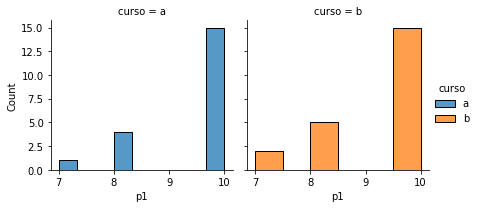

In [62]:
g = sns.FacetGrid(df,col="curso",hue="curso")
g.map(sns.histplot,"p1")
g.add_legend()

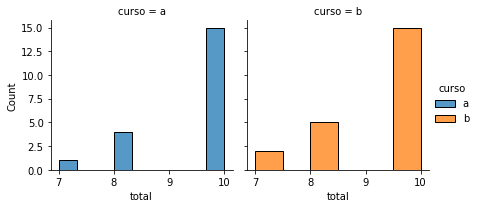

In [63]:
g = sns.FacetGrid(df,col="curso",hue="curso")
g.map(sns.histplot,"total")
g.add_legend()